In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('used_car_data.csv')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [60]:
data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [20]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [21]:
datano = data.dropna()
datano.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [4]:
data_merk = data['Name'].str.lower().str.capitalize().str.split()

In [6]:
data['Merk'] = data_merk.str[0]

In [7]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [8]:
Merk = data.pivot_table(index='Merk',aggfunc="size").sort_values(ascending=False)

In [9]:
No1 = pd.DataFrame({'Merk':Merk.index,'Jumlah':Merk.values})

In [10]:
No1

,Merk,Jumlah
0,Maruti,1211
1,Hyundai,1107
2,Honda,608
3,Toyota,411
4,Mercedes-benz,318
5,Volkswagen,315
6,Ford,300
7,Mahindra,272
8,Bmw,267
9,Audi,236


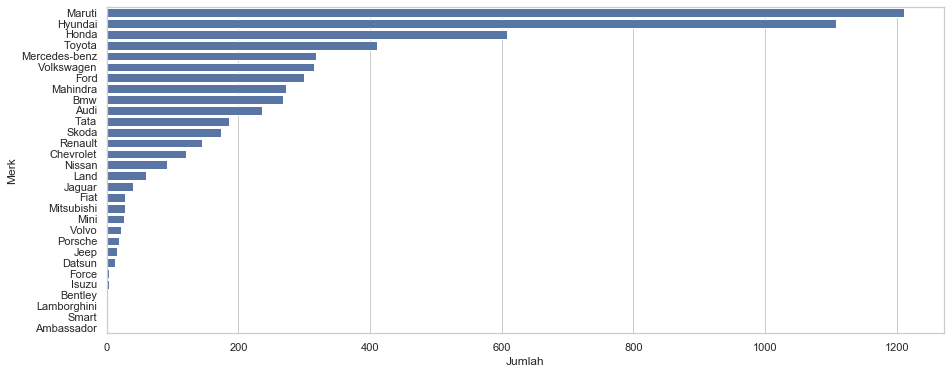

In [32]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Jumlah',y='Merk',data=No1,color='b')

In [61]:
size_l_ot = pd.pivot_table(data,index=['Location','Owner_Type'],aggfunc='size').reset_index()
size_l_ot['Size'] = size_l_ot.iloc[:,2]
size_l_ot = size_l_ot.drop(0,axis=1)

In [64]:
size_l_ot[size_l_ot['Location']=='Pune' & size_l_ot['Location']!='First']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [13]:
bekas = pd.DataFrame({'Location':size_l_ot['Location'].unique()})
bekas

,Location
0,Ahmedabad
1,Bangalore
2,Chennai
3,Coimbatore
4,Delhi
5,Hyderabad
6,Jaipur
7,Kochi
8,Kolkata
9,Mumbai


In [14]:
bekas['Location'].values

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)

In [15]:
ukuran = []

In [16]:
for loc in bekas['Location'].values:
    ukuran.append(size_l_ot.loc[(size_l_ot['Location']==loc) & (size_l_ot['Owner_Type'] != 'First'), 'Size'].sum())
bekas['Old_size'] = ukuran

In [17]:
bekas

,Location,Old_size
0,Ahmedabad,38
1,Bangalore,127
2,Chennai,159
3,Coimbatore,65
4,Delhi,97
5,Hyderabad,84
6,Jaipur,113
7,Kochi,37
8,Kolkata,32
9,Mumbai,137


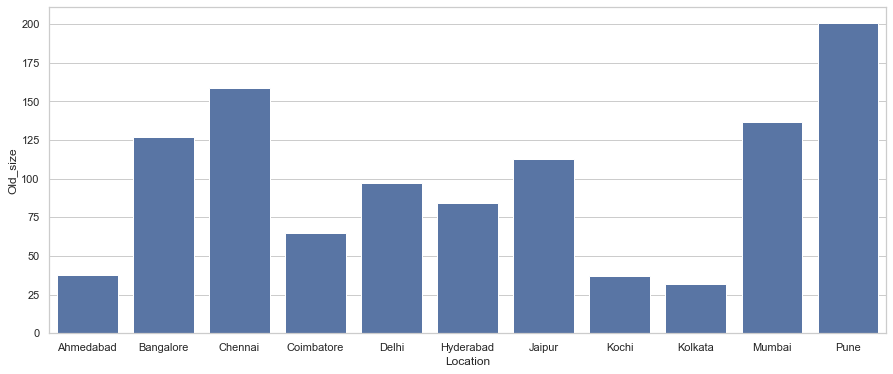

In [20]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Location',y='Old_size',data=bekas,color='b')

In [21]:
pd.pivot_table(data,index='Owner_Type',values='Year')

,Year
Owner_Type,
First,2013.932441
Fourth & Above,2006.777778
Second,2011.133264
Third,2007.893805


In [22]:
year_ot = data[['Owner_Type','Year']]

In [23]:
year_ot = year_ot[year_ot['Owner_Type']!='First']

In [24]:
thnbekas = year_ot.pivot_table(index='Year',aggfunc='size').reset_index()
thnbekas

,Year,0
0,1998,3
1,1999,1
2,2000,2
3,2001,6
4,2002,10
5,2003,12
6,2004,20
7,2005,27
8,2006,44
9,2007,60


In [25]:
seken = year_ot.pivot_table(index=['Year','Owner_Type'],aggfunc='size').reset_index()
seken

,Year,Owner_Type,0
0,1998,Second,1
1,1998,Third,2
2,1999,Second,1
3,2000,Second,2
4,2001,Fourth & Above,1
5,2001,Second,2
6,2001,Third,3
7,2002,Second,4
8,2002,Third,6
9,2003,Second,7


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Tahun edisi mobil bekas')]

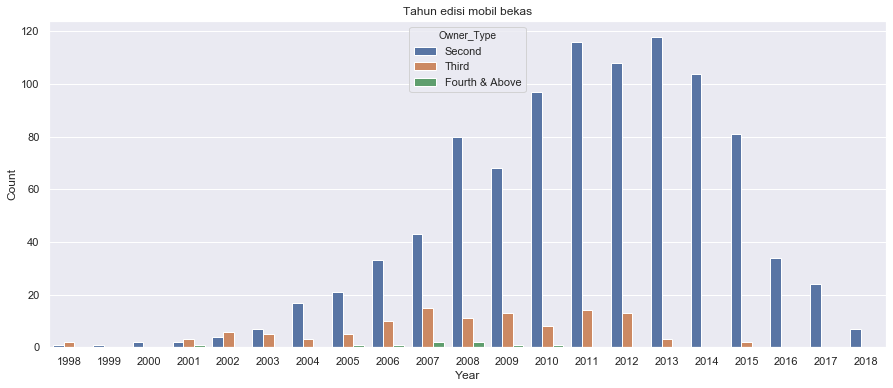

In [127]:
f, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Year',y=0,hue='Owner_Type',data=seken)
ax.set(ylabel='Count',title='Tahun edisi mobil bekas')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Tahun edisi mobil bekas')]

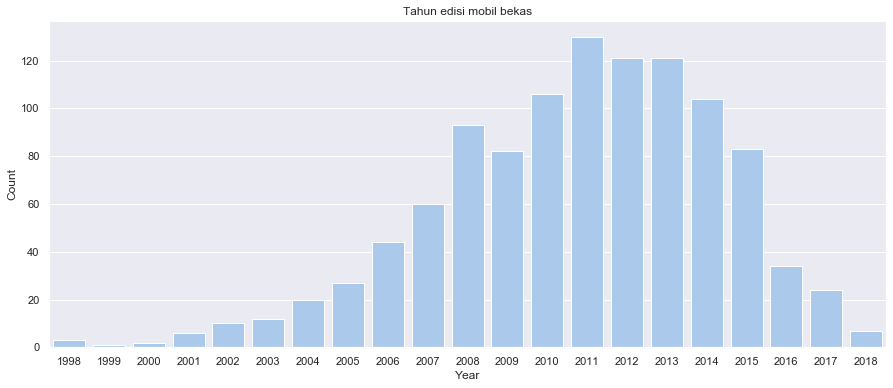

In [126]:
f, ax = plt.subplots(figsize=(15,6))
sns.set_color_codes("pastel")
sns.barplot(x='Year',y=0,data=thnbekas,color='b')
ax.set(ylabel='Count',title='Tahun edisi mobil bekas')

In [129]:
data[data['Kilometers_Driven']<100000].shape[0]

5470

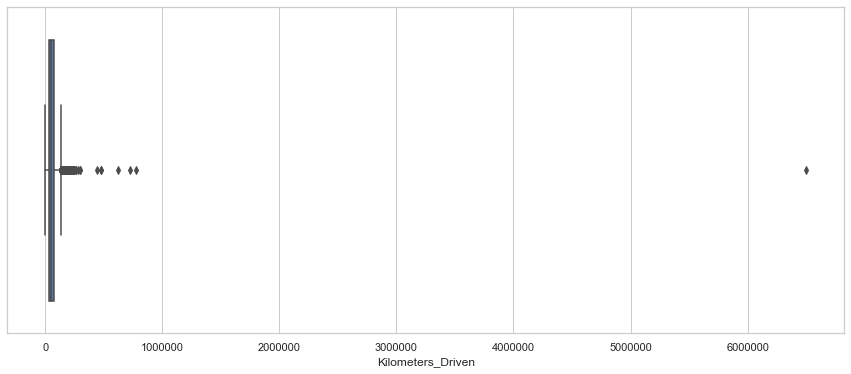

In [40]:
f, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=data['Kilometers_Driven'],ax=ax)

In [71]:
q1 = data['Kilometers_Driven'].quantile(0.25)
q3 = data['Kilometers_Driven'].quantile(0.75)
IQR = q3 - q1
UIF = q3 + 1.5*IQR
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('UIF = ',UIF)

Q1 =  34000.0
Q3 =  73000.0
IQR =  39000.0
UIF =  131500.0


In [27]:
nomax = data[data['Kilometers_Driven']!=6500000]

In [69]:
outtop

131500.0

In [143]:
data[data['Kilometers_Driven']>outtop]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merk
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,4.00,Toyota
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.0 kmpl,1396 CC,69 bhp,5.0,2.50,Tata
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,4.50,Toyota
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2012,136997,Diesel,Automatic,First,17.2 kmpl,1968 CC,138.1 bhp,5.0,8.50,Skoda
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,4.42,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2008,192000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,6.85,Toyota
5871,Ford Endeavour 4x2 XLT Limited Edition,Pune,2009,180000,Diesel,Manual,First,10.9 kmpl,2499 CC,143 bhp,7.0,7.50,Ford
5914,Skoda Octavia Elegance 1.9 TDI,Hyderabad,2003,132000,Diesel,Manual,First,18.7 kmpl,1896 CC,66 bhp,5.0,2.25,Skoda
5953,Ford Figo Diesel EXI,Jaipur,2012,140000,Diesel,Manual,First,20.0 kmpl,1399 CC,68 bhp,5.0,2.51,Ford


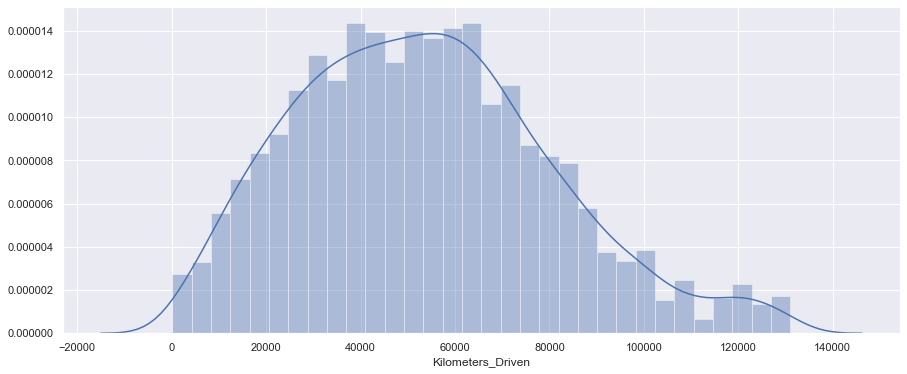

In [162]:
f, ax=plt.subplots(figsize=(15,6))
sns.distplot(nooutlierkm['Kilometers_Driven'])

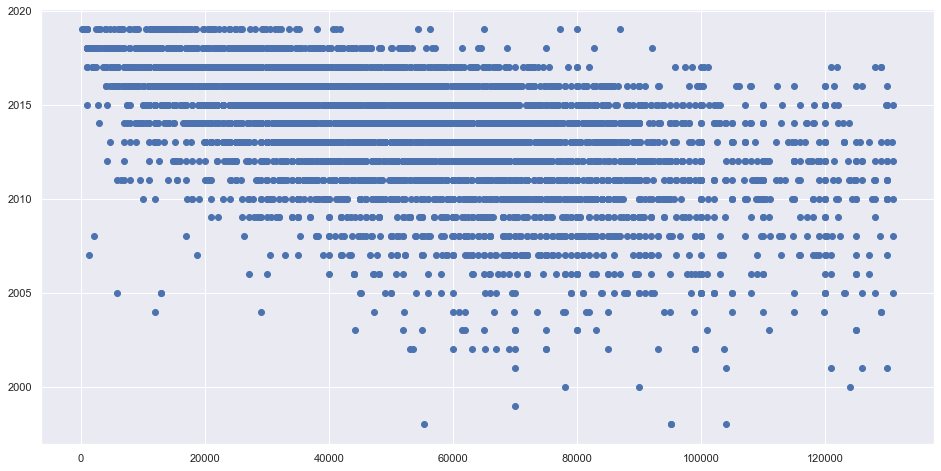

In [161]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(nooutlierkm['Kilometers_Driven'],nooutlierkm['Year'])
plt.show()

[Text(0.5, 1, 'Data Kilometers_Driven tanpa outlier')]

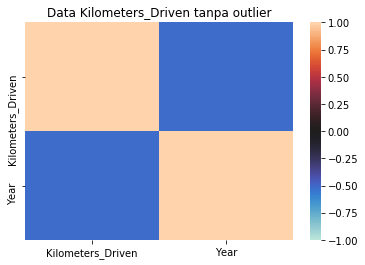

In [23]:
corr = nooutlierkm[['Kilometers_Driven','Year']].corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0)
ax.set(title="Data Kilometers_Driven tanpa outlier")

[Text(0.5, 1, 'Data Kilometers_Driven dengan outlier')]

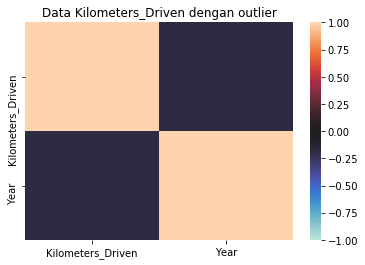

In [24]:
corr = datano[['Kilometers_Driven','Year']].corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0)
ax.set(title="Data Kilometers_Driven dengan outlier")

In [152]:
import scipy.stats

In [155]:
result = scipy.stats.kendalltau(data['Kilometers_Driven'],data['Year'])
result

KendalltauResult(correlation=-0.40588290193567417, pvalue=0.0)

In [22]:
nooutlierkm = datano[datano['Kilometers_Driven']<outtop]

In [167]:
result = scipy.stats.linregress(noout2['Kilometers_Driven'],noout2['Year'])
result

LinregressResult(slope=-6.168587964168068e-05, intercept=2016.7574854253446, rvalue=-0.5094160542432572, pvalue=0.0, stderr=1.371310789781135e-06)

In [164]:
q1o = nooutlierkm['Kilometers_Driven'].quantile(0.25)
q3o = nooutlierkm['Kilometers_Driven'].quantile(0.75)
IQRo = q3o - q1o
outtopo = q3o + 1.5*IQRo

In [166]:
noout2 = nooutlierkm[nooutlierkm['Kilometers_Driven']<outtopo]

In [73]:
data2=data[data['Fuel_Type']!='Electric']

In [25]:
data_power = nooutlierkm['Power'].str.split()
nooutlierkm['power'] = data_power.str[0]
nooutlierkm

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,power
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,74
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,71
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,112
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,67.1


In [26]:
data_engine = nooutlierkm['Engine'].str.split()
nooutlierkm['engine'] = data_engine.str[0]
nooutlierkm

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,power,engine
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.2,1582
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.7,1199
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.8,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,74,1248
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,71,1120
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,112,2498
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,67.1,998


In [74]:
data_mileage = data2['Mileage'].str.split()
data2['mileage'] = data_mileage.str[0]
data2

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,28.4
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,24.4
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,14.0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,18.9


In [51]:
data = data.drop(data[data['Mileage'].isnull()].index)

In [31]:
nooutlierkm.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                 0
Price                 0
power                96
engine                0
mileage               0
dtype: int64

In [76]:
data2['mileage']=pd.to_numeric(data2['mileage'],errors='coerce')

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
nooutlierkm['mileage']=pd.to_numeric(nooutlierkm['mileage'],errors='coerce')
nooutlierkm['power']=pd.to_numeric(nooutlierkm['power'],errors='coerce')
nooutlierkm['engine']=pd.to_numeric(nooutlierkm['engine'],errors='coerce')

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [32]:
fix = nooutlierkm.dropna()
fix

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,power,engine,mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,74.00,1248,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,71.00,1120,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,112.00,2498,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,67.10,998,18.90


In [53]:
data.loc[data['units']=='km/kg','mileage'].tolist()

[26.6,
 21.1,
 26.6,
 26.3,
 15.1,
 26.83,
 13.2,
 26.2,
 17.3,
 26.3,
 26.2,
 33.44,
 15.1,
 33.54,
 26.6,
 17.5,
 26.6,
 26.6,
 25.0,
 33.54,
 24.6,
 17.5,
 13.45,
 25.0,
 33.54,
 26.6,
 13.45,
 19.2,
 24.6,
 22.1,
 17.0,
 26.2,
 31.79,
 13.45,
 26.6,
 22.8,
 26.2,
 32.26,
 33.54,
 20.0,
 26.6,
 26.2,
 26.83,
 33.44,
 15.1,
 17.3,
 22.1,
 33.44,
 14.53,
 21.4,
 33.54,
 26.6,
 15.1,
 33.44,
 26.6,
 15.1,
 31.79,
 26.2,
 26.6,
 30.46,
 26.6,
 17.5,
 26.6,
 26.2,
 32.26,
 26.2]

In [37]:
def conv(x):
    return x*0.775
data.loc[data['units']=='km/kg','mileage'] = data.loc[data['units']=='km/kg','mileage'].apply(conv)

In [38]:
data.loc[data['units']=='km/kg','mileage'].to_list()

[20.615000000000002,
 16.352500000000003,
 20.615000000000002,
 20.3825,
 11.7025,
 20.79325,
 10.23,
 20.305,
 13.4075,
 20.3825,
 20.305,
 25.916,
 11.7025,
 25.9935,
 20.615000000000002,
 13.5625,
 20.615000000000002,
 20.615000000000002,
 19.375,
 25.9935,
 19.065,
 13.5625,
 10.42375,
 19.375,
 25.9935,
 20.615000000000002,
 10.42375,
 14.879999999999999,
 19.065,
 17.1275,
 13.175,
 20.305,
 24.63725,
 10.42375,
 20.615000000000002,
 17.67,
 20.305,
 25.0015,
 25.9935,
 15.5,
 20.615000000000002,
 20.305,
 20.79325,
 25.916,
 11.7025,
 13.4075,
 17.1275,
 25.916,
 11.26075,
 16.585,
 25.9935,
 20.615000000000002,
 11.7025,
 25.916,
 20.615000000000002,
 11.7025,
 24.63725,
 20.305,
 20.615000000000002,
 23.6065,
 20.615000000000002,
 13.5625,
 20.615000000000002,
 20.305,
 25.0015,
 20.305]

In [58]:
data.loc[data['Fuel_Type']=='CNG','units'].unique()

array(['km/kg'], dtype=object)

In [57]:
data.loc[data['Fuel_Type']=='LPG','units'].unique()

array(['km/kg'], dtype=object)

In [79]:
pd.pivot_table(data2,index='Fuel_Type',values='mileage',aggfunc=np.median)

,mileage
Fuel_Type,
CNG,26.60
Diesel,19.01
LPG,18.25
Petrol,17.80


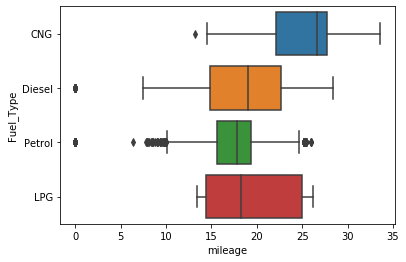

In [78]:
sns.boxplot(x=data2['mileage'],y=data2['Fuel_Type'])

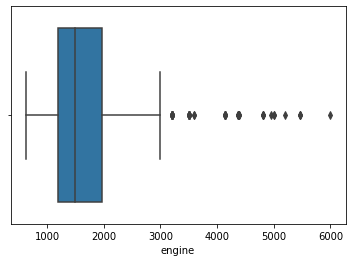

In [35]:
sns.boxplot(x=fix['engine'])

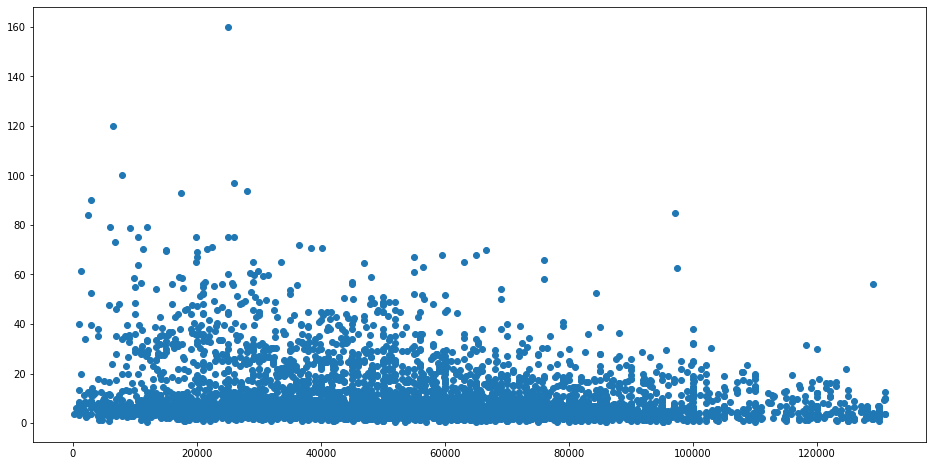

In [36]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(fix['Kilometers_Driven'],fix['Price'])
plt.show()

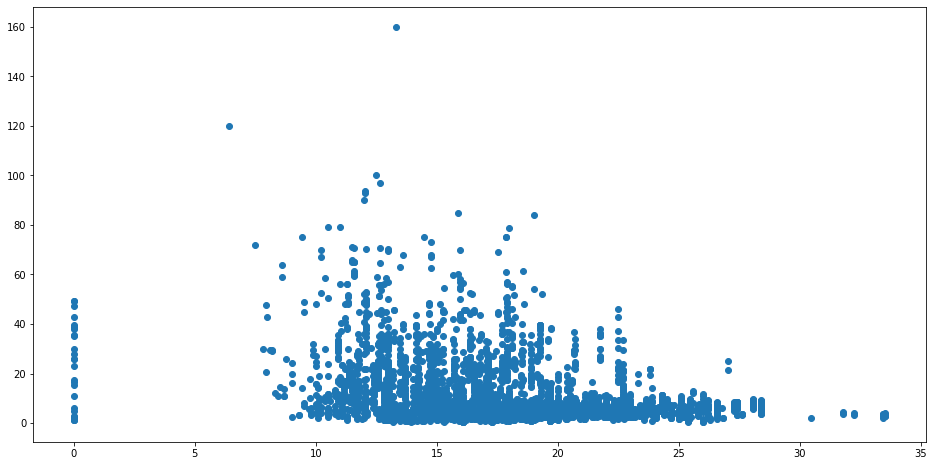

In [37]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(fix['mileage'],fix['Price'])
plt.show()

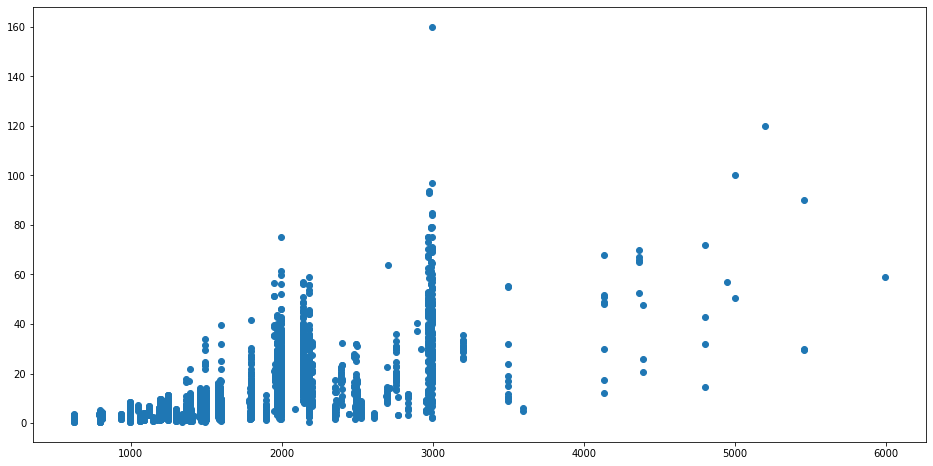

In [38]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(fix['engine'],fix['Price'])
plt.show()

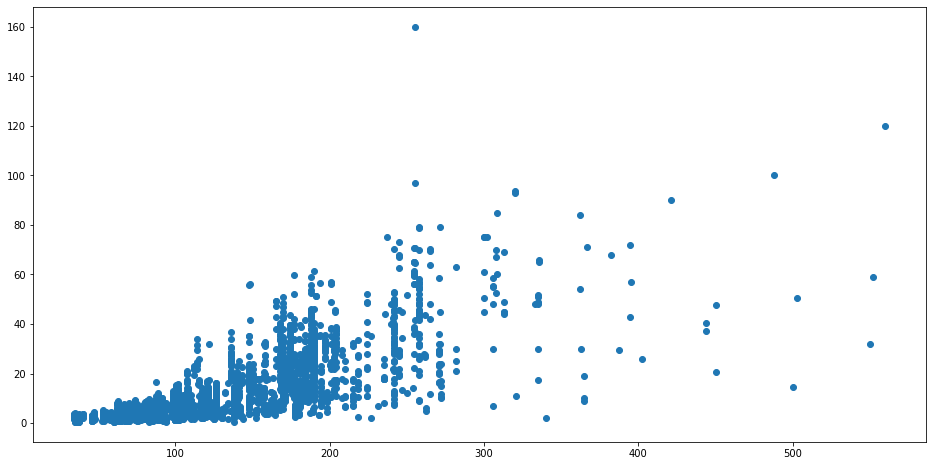

In [39]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(fix['power'],fix['Price'])
plt.show()

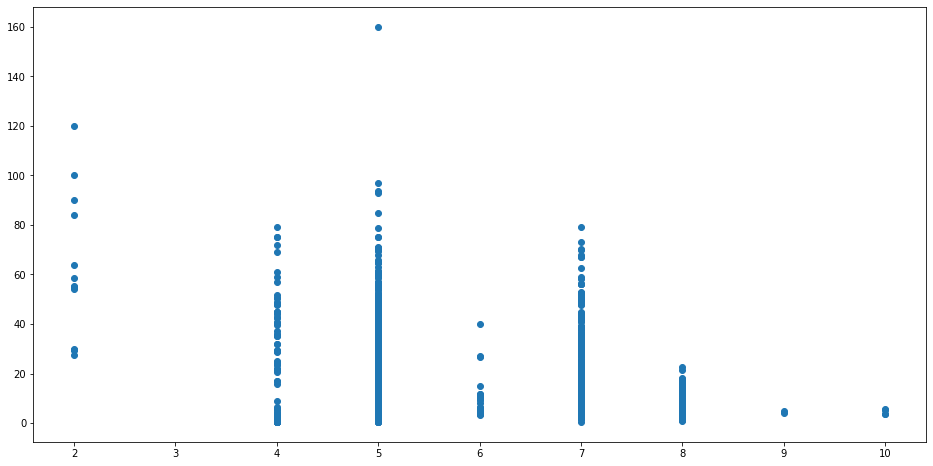

In [40]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(fix['Seats'],fix['Price'])
plt.show()

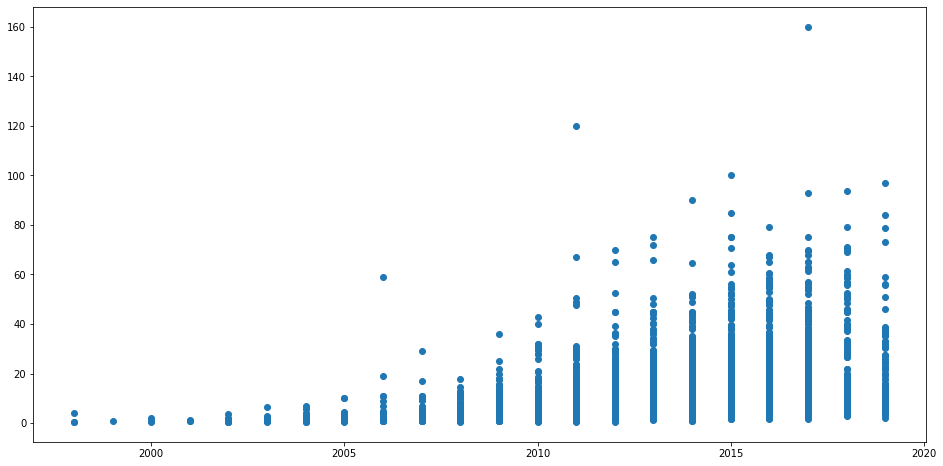

In [41]:
f, ax=plt.subplots(figsize=(16,8))
ax.scatter(fix['Year'],fix['Price'])
plt.show()

In [43]:
fix.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'power', 'engine', 'mileage'],
      dtype='object')

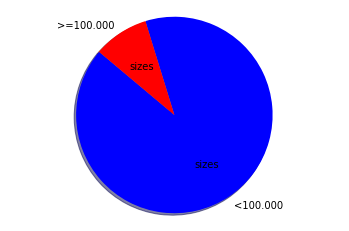

In [65]:
ks = data[data['Kilometers_Driven']<100000].shape[0]
ls = data[data['Kilometers_Driven']>=100000].shape[0]
dic =  {'<100.000':ks,'>=100.000':ls}
labels = ['<100.000','>=100.000']
sizes = [ks,ls]
colors = ['blue','red']
plt.pie(sizes, labels=labels, colors=colors,
autopct='sizes', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B07AFDC608>,
      dtype=object)

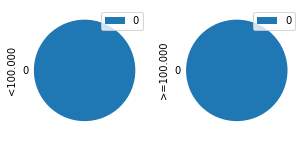

In [59]:
sepribu.plot.pie(subplots=True,figsize=(5,5))

In [66]:
ks

5470

In [67]:
ls

549